In [ ]:
import pandas as pd
import seaborn as sns

In [202]:
df = pd.read_csv("timedata.csv")

df.head(10)

,Date,Category,Name,Hours
0,2023-10-16,Proj,Ex1,5.0
1,2023-10-16,Proj,Ex2,0.5
2,2023-10-16,Proj,Ex3,1.5
3,2023-10-16,Area,Managing,1.0
4,2023-10-16,Area,Customer,3.0
5,2023-10-16,Area,Learning,4.5
6,2023-10-16,Focus,Collab.Meeting,3.5
7,2023-10-16,Focus,Collab.Other,1.5
8,2023-10-16,Focus,Deep,4.0
9,2023-10-16,Prof,Management,5.0


In [203]:
df.describe()

,Hours
count,40.000000
mean,2.500000
std,1.746792
min,0.000000
25%,1.000000
50%,2.000000
75%,4.125000
max,6.500000


In [204]:
print(df.info())
print(df.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      40 non-null     object 
 1   Category  40 non-null     object 
 2   Name      40 non-null     object 
 3   Hours     40 non-null     float64
dtypes: float64(1), object(3)
memory usage: 1.4+ KB
None
Date        Category  Name            Hours
2023-10-16  Area      Customer        3.0      1
                      Learning        4.5      1
2023-10-17  Prof      Management      3.5      1
            Proj      Ex1             5.0      1
                      Ex2             1.5      1
                      Ex3             1.0      1
2023-10-20  Area      Customer        0.0      1
                      Learning        4.5      1
                      Managing        1.0      1
                      Research        3.0      1
            Focus     Collab.Meeting  5.5      1
                      Co

In [217]:
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Week"] = df["Date"].dt.isocalendar().week
df["Day"] = df["Date"].dt.day
df["Weekday"] = df["Date"].dt.weekday
df["Quarter"] = df["Date"].dt.quarter
print(df.info())
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      40 non-null     datetime64[ns]
 1   Category  40 non-null     object        
 2   Name      40 non-null     object        
 3   Hours     40 non-null     float64       
 4   Year      40 non-null     int32         
 5   Month     40 non-null     int32         
 6   Week      40 non-null     UInt32        
 7   Day       40 non-null     int32         
 8   Weekday   40 non-null     int32         
 9   Quarter   40 non-null     int32         
 10  Type      40 non-null     object        
dtypes: UInt32(1), datetime64[ns](1), float64(1), int32(5), object(3)
memory usage: 2.7+ KB
None


,Date,Category,Name,Hours,Year,Month,Week,Day,Weekday,Quarter,Type
0,2023-10-16,Proj,Ex1,5.0,2023,10,42,16,0,4,Proj.Ex1
1,2023-10-16,Proj,Ex2,0.5,2023,10,42,16,0,4,Proj.Ex2
2,2023-10-16,Proj,Ex3,1.5,2023,10,42,16,0,4,Proj.Ex3
3,2023-10-16,Area,Managing,1.0,2023,10,42,16,0,4,Area.Managing
4,2023-10-16,Area,Customer,3.0,2023,10,42,16,0,4,Area.Customer
5,2023-10-16,Area,Learning,4.5,2023,10,42,16,0,4,Area.Learning
6,2023-10-16,Focus,Collab.Meeting,3.5,2023,10,42,16,0,4,Focus.Collab.Meeting
7,2023-10-16,Focus,Collab.Other,1.5,2023,10,42,16,0,4,Focus.Collab.Other
8,2023-10-16,Focus,Deep,4.0,2023,10,42,16,0,4,Focus.Deep
9,2023-10-16,Prof,Management,5.0,2023,10,42,16,0,4,Prof.Management


In [220]:
focus_df = df[df["Category"] == "Focus"]
prof_df = df[df["Category"] == "Prof"]
area_df = df[df["Category"] == "Area"]
proj_df = df[df["Category"] == "Proj"]

In [284]:
focus_pivot_df = focus_df.pivot(index="Date", columns="Name", values="Hours")
focus_pivot_df.head()

Name,Collab.Meeting,Collab.Other,Deep
Date,,,
2023-10-16,3.5,1.5,4.0
2023-10-17,2.5,1.0,5.0
2023-10-20,5.5,1.0,2.5


In [256]:
# focus_df[focus_df['Name'] == 'Collab.Meeting'].groupby('Weekday')['Hours'].mean()
focus_pivot_df["Collab.Meeting"]

Weekday
0    3.5
1    2.5
4    5.5
Name: Hours, dtype: float64

In [221]:
df.groupby("Category")["Hours"].sum()

Category
Area     24.0
Focus    26.5
Prof     26.5
Proj     23.0
Name: Hours, dtype: float64

In [223]:
focus_df.groupby("Name")["Hours"].sum()

Name
Collab.Meeting    11.5
Collab.Other       3.5
Deep              11.5
Name: Hours, dtype: float64

Text(0.5, 1.0, 'Focus Time')

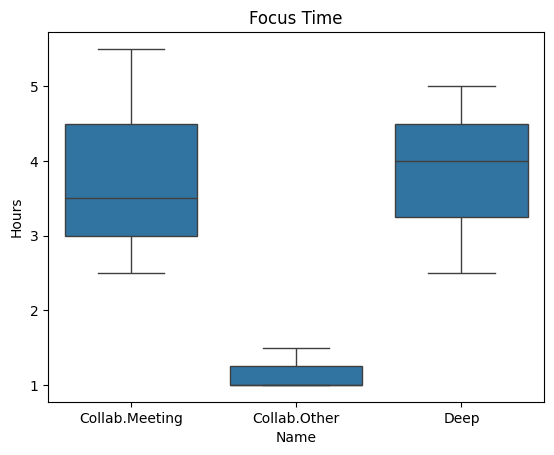

In [233]:
# meetings = df.loc[(df['Category'] == 'Focus') & (df['Name'] == 'Collab.Meeting')]
sns.boxplot(focus_df, x="Name", y="Hours").set_title("Focus Time")

In [239]:
focus_df.groupby("Weekday")["Hours"].sum()

Weekday
0    9.0
1    8.5
4    9.0
Name: Hours, dtype: float64

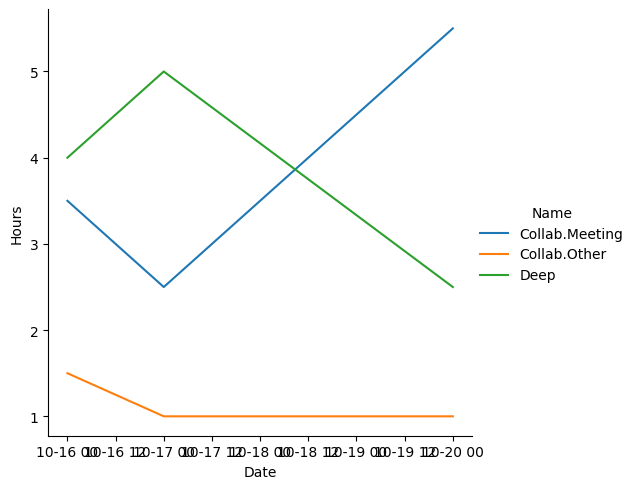

In [242]:
sns.relplot(focus_df, x="Date", y="Hours", hue="Name", kind="line")

         Date Category         Name  Hours  Year  Month  Week  Day  Weekday  \
9  2023-10-16     Prof   Management    5.0  2023     10    42   16        0   
10 2023-10-16     Prof     Creation    2.0  2023     10    42   16        0   
11 2023-10-16     Prof  Consumption    1.0  2023     10    42   16        0   
12 2023-10-16     Prof     Ideation    1.0  2023     10    42   16        0   
22 2023-10-17     Prof   Management    3.5  2023     10    42   17        1   
23 2023-10-17     Prof     Creation    2.0  2023     10    42   17        1   
24 2023-10-17     Prof  Consumption    2.0  2023     10    42   17        1   
25 2023-10-17     Prof     Ideation    1.0  2023     10    42   17        1   
36 2023-10-20     Prof   Management    6.5  2023     10    42   20        4   
37 2023-10-20     Prof     Creation    1.0  2023     10    42   20        4   

    Quarter  
9         4  
10        4  
11        4  
12        4  
22        4  
23        4  
24        4  
25        4  
36  

Text(0.5, 1.0, 'Professional Time')

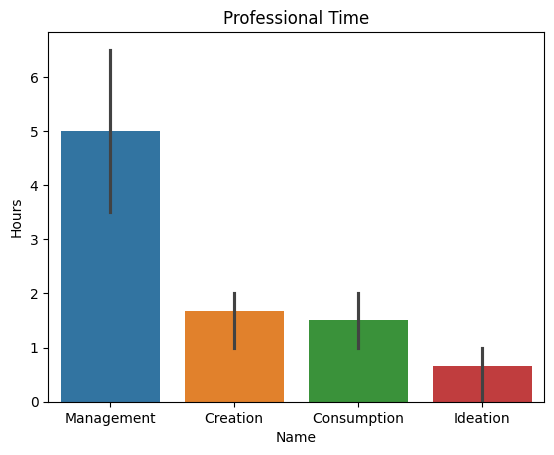

In [209]:
prof = df.loc[(df["Category"] == "Prof")]
print(prof.head(10))
sns.barplot(prof, x="Name", y="Hours", hue="Name").set_title("Professional Time")

         Date Category            Name  Hours  Year  Month  Week  Day  \
6  2023-10-16    Focus  Collab.Meeting    3.5  2023     10    42   16   
7  2023-10-16    Focus    Collab.Other    1.5  2023     10    42   16   
8  2023-10-16    Focus            Deep    4.0  2023     10    42   16   
19 2023-10-17    Focus  Collab.Meeting    2.5  2023     10    42   17   
20 2023-10-17    Focus    Collab.Other    1.0  2023     10    42   17   
21 2023-10-17    Focus            Deep    5.0  2023     10    42   17   
33 2023-10-20    Focus  Collab.Meeting    5.5  2023     10    42   20   
34 2023-10-20    Focus    Collab.Other    1.0  2023     10    42   20   
35 2023-10-20    Focus            Deep    2.5  2023     10    42   20   

    Weekday  Quarter  
6         0        4  
7         0        4  
8         0        4  
19        1        4  
20        1        4  
21        1        4  
33        4        4  
34        4        4  
35        4        4  


Text(0.5, 1.0, 'Focus')

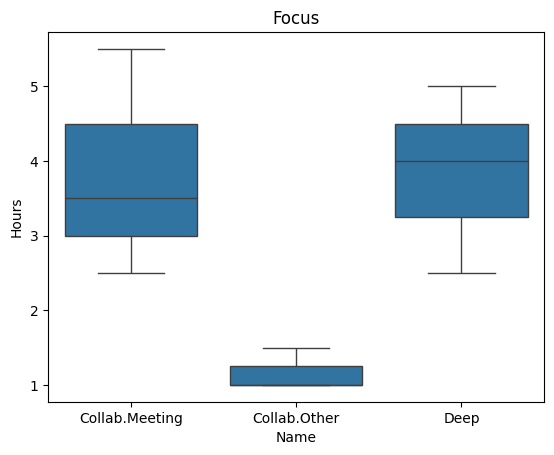

In [210]:
focus = df.loc[(df["Category"] == "Focus")]
print(focus.head(10))
sns.boxplot(focus, x="Name", y="Hours").set_title("Focus")

<Axes: xlabel='Date', ylabel='Hours'>

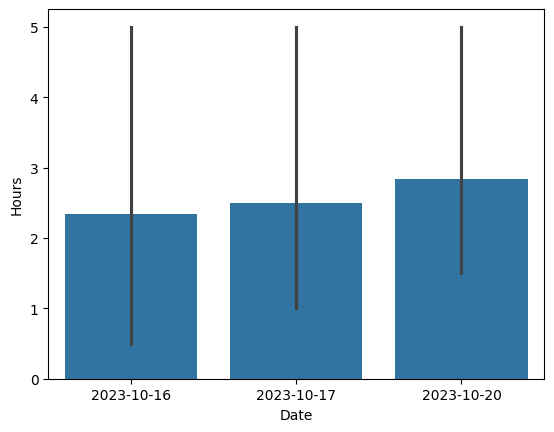

In [211]:
projects = df.loc[df["Category"] == "Proj"]
projects.head()
sns.barplot(projects, x="Date", y="Hours")

In [212]:
df["Type"] = df["Category"] + "." + df["Name"]
df.head(10)

,Date,Category,Name,Hours,Year,Month,Week,Day,Weekday,Quarter,Type
0,2023-10-16,Proj,Ex1,5.0,2023,10,42,16,0,4,Proj.Ex1
1,2023-10-16,Proj,Ex2,0.5,2023,10,42,16,0,4,Proj.Ex2
2,2023-10-16,Proj,Ex3,1.5,2023,10,42,16,0,4,Proj.Ex3
3,2023-10-16,Area,Managing,1.0,2023,10,42,16,0,4,Area.Managing
4,2023-10-16,Area,Customer,3.0,2023,10,42,16,0,4,Area.Customer
5,2023-10-16,Area,Learning,4.5,2023,10,42,16,0,4,Area.Learning
6,2023-10-16,Focus,Collab.Meeting,3.5,2023,10,42,16,0,4,Focus.Collab.Meeting
7,2023-10-16,Focus,Collab.Other,1.5,2023,10,42,16,0,4,Focus.Collab.Other
8,2023-10-16,Focus,Deep,4.0,2023,10,42,16,0,4,Focus.Deep
9,2023-10-16,Prof,Management,5.0,2023,10,42,16,0,4,Prof.Management


In [213]:
# Hours per day
hours_per_day = df.loc[df["Category"] == "Focus"].groupby("Date")["Hours"].sum()
hours_per_day.describe()

count    3.000000
mean     8.833333
std      0.288675
min      8.500000
25%      8.750000
50%      9.000000
75%      9.000000
max      9.000000
Name: Hours, dtype: float64

In [214]:
df2 = (
    df.loc[df["Category"] == "Focus"]
    .filter(["Date", "Hours"])
    .groupby("Date")
    .agg("sum")
)
df2["Meetings"] = (
    df.loc[(df["Name"] == "Collab.Meeting")].groupby("Date").agg("sum")["Hours"]
)
df2["NonMeetingCollab"] = (
    df.loc[(df["Name"] == "Collab.Other")].groupby("Date").agg("sum")["Hours"]
)
df2["Deep"] = df.loc[(df["Name"] == "Deep")].groupby("Date").agg("sum")["Hours"]
df2["Management"] = (
    df.loc[(df["Category"] == "Prof") & (df["Name"] == "Management")]
    .groupby("Date")
    .agg("sum")["Hours"]
)
df2["Consumption"] = (
    df.loc[(df["Category"] == "Prof") & (df["Name"] == "Consumption")]
    .groupby("Date")
    .agg("sum")["Hours"]
)
df2["Creation"] = (
    df.loc[(df["Category"] == "Prof") & (df["Name"] == "Creation")]
    .groupby("Date")
    .agg("sum")["Hours"]
)
df2["Ideation"] = (
    df.loc[(df["Category"] == "Prof") & (df["Name"] == "Ideation")]
    .groupby("Date")
    .agg("sum")["Hours"]
)
df2.head(10)

,Hours,Meetings,NonMeetingCollab,Deep,Management,Consumption,Creation,Ideation
Date,,,,,,,,
2023-10-16,9.0,3.5,1.5,4.0,5.0,1.0,2.0,1.0
2023-10-17,8.5,2.5,1.0,5.0,3.5,2.0,2.0,1.0
2023-10-20,9.0,5.5,1.0,2.5,6.5,1.5,1.0,0.0


<Axes: >

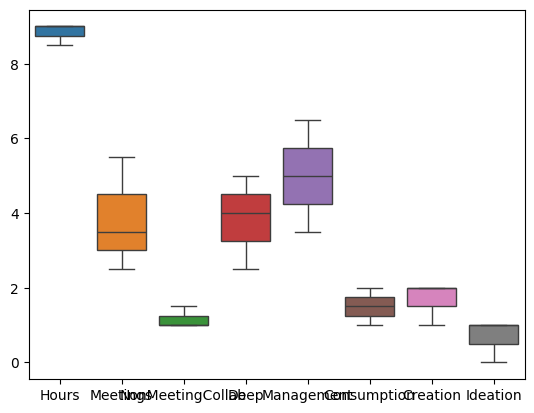

In [215]:
sns.boxplot(df2)

In [282]:
raw_pkt_data = [
    ["AES-GCM", 64, 4],
    ["AES-GCM", 128, 8],
    ["AES-GCM", 256, 16],
    ["AES-GCM", 512, 32],
    ["AES-GCM", 1024, 64],
    ["AES-GCM", 1280, 64],
    ["AES-GCM", 1500, 64],
    ["AES-GCM", 2048, 65],
    ["CCP", 128, 8],
    ["CCP", 256, 16],
    ["CCP", 512, 30],
    ["CCP", 1024, 56],
    ["CCP", 1280, 56],
    ["CCP", 1500, 56],
    ["CCP", 2048, 56],
]
pkt_df = pd.DataFrame(raw_pkt_data, columns=["Algorithm", "Size", "Tput"])
pkt_df.head()

,Algorithm,Size,Tput
0,AES-GCM,64,4
1,AES-GCM,128,8
2,AES-GCM,256,16
3,AES-GCM,512,32
4,AES-GCM,1024,64


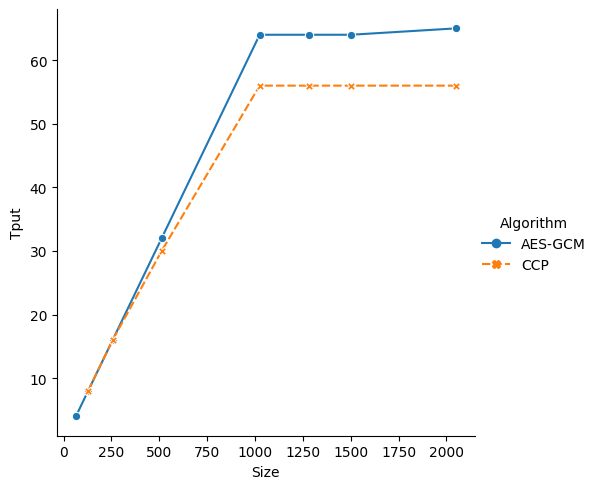

In [283]:
sns.relplot(
    pkt_df,
    x="Size",
    y="Tput",
    hue="Algorithm",
    style="Algorithm",
    markers=True,
    kind="line",
)